Importing the Dependencies

In [81]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [82]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('credit_data.csv')

In [83]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [84]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
77333,57003,-1.565835,0.537575,3.284121,3.229021,-0.917761,2.016339,-1.157749,1.086392,0.234172,...,0.125678,1.072830,-0.229837,0.094444,0.215087,0.544487,0.271867,-0.089124,25.69,0.0
77334,57005,-0.710264,-0.095320,2.899716,0.718612,-0.501955,0.968641,-0.007123,0.308006,1.383339,...,0.069589,0.711129,-0.038570,0.088990,-0.282553,-0.448201,0.054450,-0.051693,65.00,0.0
77335,57005,0.875729,-0.658494,-0.798643,-0.889801,-0.205406,-1.093946,0.743501,-0.381269,0.405087,...,0.192299,0.161282,-0.451218,0.060376,0.885705,-0.477421,-0.036297,0.035704,235.53,0.0
77336,57006,-0.679923,1.074176,1.045563,1.100620,-0.764069,-1.048969,0.601586,0.283135,-0.674820,...,0.256539,0.475028,0.124473,0.886947,-0.327076,-0.362904,0.017048,0.109040,73.52,0.0
77337,57006,1.380239,-1.328341,1.488601,-1.259442,-2.253642,-0.193980,-1.799733,0.139147,-1.245753,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77338 entries, 0 to 77337
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    77338 non-null  int64  
 1   V1      77338 non-null  float64
 2   V2      77338 non-null  float64
 3   V3      77338 non-null  float64
 4   V4      77338 non-null  float64
 5   V5      77338 non-null  float64
 6   V6      77338 non-null  float64
 7   V7      77338 non-null  float64
 8   V8      77338 non-null  float64
 9   V9      77338 non-null  float64
 10  V10     77338 non-null  float64
 11  V11     77338 non-null  float64
 12  V12     77338 non-null  float64
 13  V13     77338 non-null  float64
 14  V14     77337 non-null  float64
 15  V15     77337 non-null  float64
 16  V16     77337 non-null  float64
 17  V17     77337 non-null  float64
 18  V18     77337 non-null  float64
 19  V19     77337 non-null  float64
 20  V20     77337 non-null  float64
 21  V21     77337 non-null  float64
 22

In [86]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [87]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

0.0    77149
1.0      188
Name: Class, dtype: int64

In [89]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [90]:
print(legit.shape)
print(fraud.shape)

(77149, 31)
(188, 31)


In [91]:

legit.Amount.describe()

count    77149.000000
mean        97.625867
std        270.623024
min          0.000000
25%          7.690000
50%         26.800000
75%         89.000000
max      19656.530000
Name: Amount, dtype: float64

In [92]:
fraud.Amount.describe()

count     188.000000
mean       94.292500
std       214.093799
min         0.000000
25%         1.000000
50%         7.550000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [93]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,36643.938353,-0.239252,-0.043518,0.701351,0.152168,-0.264608,0.10159,-0.097359,0.046639,0.005268,...,0.042235,-0.030677,-0.105246,-0.038271,0.007363,0.134344,0.025494,0.000766,0.002836,97.625867
1.0,32055.739362,-6.692335,4.711159,-8.903156,5.250821,-4.905270,-2.04085,-7.040342,3.194879,-3.137542,...,0.374793,0.797237,-0.171993,-0.229811,-0.084322,0.242355,0.097236,0.586565,0.050794,94.292500


In [94]:
legit_sample = legit.sample(n=492)

In [95]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [96]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
17163,28489,-2.321329,1.981120,0.711237,0.267215,-0.956023,-0.222640,-0.670429,1.586265,-1.002585,...,0.228655,0.316666,-0.119615,0.005984,0.096149,0.866674,0.083378,0.060717,15.10,0.0
46536,42825,1.077104,-0.247810,0.077489,0.729582,-0.200333,-0.183833,0.153573,-0.150266,0.408852,...,-0.212279,-0.643315,-0.196681,-0.399464,0.547189,0.307319,-0.040013,0.025070,117.74,0.0
38310,39337,1.164885,-0.240443,0.614138,0.072645,-0.618840,-0.086458,-0.366583,0.131365,0.481940,...,-0.022051,0.194650,-0.016889,0.329151,0.318711,1.111314,-0.052576,-0.011697,4.00,0.0
76094,56392,-0.867481,1.400269,0.346300,1.078750,-0.735503,-0.533102,0.074273,0.749642,-0.806598,...,0.273315,0.570699,0.119109,0.406282,-0.233972,-0.326627,-0.258707,-0.117068,47.92,0.0
74230,55479,1.010723,-0.848479,0.004338,-0.374214,-1.079271,-1.100339,-0.197644,-0.278809,-0.901714,...,-0.021567,-0.602509,-0.064466,0.309857,0.177091,-0.502569,-0.012628,0.079636,210.00,0.0


In [97]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
75511,56098,-1.229669,1.956099,-0.851198,2.796987,-1.913977,-0.044934,-1.340739,-0.555548,-1.184468,...,1.208054,0.277612,0.019266,0.508529,-0.201183,-0.249600,0.562239,0.075309,170.92,1.0
76555,56624,-7.901421,2.720472,-7.885936,6.348334,-5.480119,-0.333059,-8.682376,1.164431,-4.542447,...,0.077739,1.092437,0.320133,-0.434643,-0.380687,0.213630,0.423620,-0.105169,153.46,1.0
76609,56650,-8.762083,2.791030,-7.682767,6.991214,-5.230695,-0.357388,-9.685621,1.749335,-4.495679,...,-0.090527,0.348590,0.051132,-0.415430,0.219665,0.330020,-0.028252,-0.156270,7.52,1.0
76929,56806,0.016828,2.400826,-4.220360,3.462217,-0.624142,-1.294303,-2.986028,0.751883,-1.606672,...,0.285832,-0.771508,-0.265200,-0.873077,0.939776,-0.219085,0.874494,0.470434,1.00,1.0
77099,56887,-0.075483,1.812355,-2.566981,4.127549,-1.628532,-0.805895,-3.390135,1.019353,-2.451251,...,0.794372,0.270471,-0.143624,0.013566,0.634203,0.213693,0.773625,0.387434,5.00,1.0


In [98]:
new_dataset['Class'].value_counts()

0.0    492
1.0    188
Name: Class, dtype: int64

In [99]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,37175.575203,-0.268240,-0.136712,0.693140,0.072732,-0.374327,0.084815,-0.114727,0.022301,0.033705,...,-0.016255,-0.009168,-0.143798,-0.059507,-0.006534,0.149268,0.044817,-0.001348,0.009195,106.96124
1.0,32055.739362,-6.692335,4.711159,-8.903156,5.250821,-4.905270,-2.040850,-7.040342,3.194879,-3.137542,...,0.374793,0.797237,-0.171993,-0.229811,-0.084322,0.242355,0.097236,0.586565,0.050794,94.29250


Splitting the data into Features & Targets

In [100]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [101]:
print(X)

        Time        V1        V2        V3        V4        V5        V6  \
17163  28489 -2.321329  1.981120  0.711237  0.267215 -0.956023 -0.222640   
46536  42825  1.077104 -0.247810  0.077489  0.729582 -0.200333 -0.183833   
38310  39337  1.164885 -0.240443  0.614138  0.072645 -0.618840 -0.086458   
76094  56392 -0.867481  1.400269  0.346300  1.078750 -0.735503 -0.533102   
74230  55479  1.010723 -0.848479  0.004338 -0.374214 -1.079271 -1.100339   
...      ...       ...       ...       ...       ...       ...       ...   
75511  56098 -1.229669  1.956099 -0.851198  2.796987 -1.913977 -0.044934   
76555  56624 -7.901421  2.720472 -7.885936  6.348334 -5.480119 -0.333059   
76609  56650 -8.762083  2.791030 -7.682767  6.991214 -5.230695 -0.357388   
76929  56806  0.016828  2.400826 -4.220360  3.462217 -0.624142 -1.294303   
77099  56887 -0.075483  1.812355 -2.566981  4.127549 -1.628532 -0.805895   

             V7        V8        V9  ...       V20       V21       V22  \
17163 -0.6704

In [102]:
print(Y)

17163    0.0
46536    0.0
38310    0.0
76094    0.0
74230    0.0
        ... 
75511    1.0
76555    1.0
76609    1.0
76929    1.0
77099    1.0
Name: Class, Length: 680, dtype: float64


Split the data into Training data & Testing Data

In [103]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=2)

In [104]:
print(X.shape, X_train.shape, X_test.shape)

(680, 30) (476, 30) (204, 30)


In [105]:
acc=[]
models=[]

# **ACCURACY FOR LR**

In [106]:
# training the Logistic Regression Model with Training Data
model = LogisticRegression()
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [107]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)


acc.append(test_data_accuracy)
models.append('Logistic Regression')

In [108]:
print('Accuracy on Training data : ', training_data_accuracy)
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy on Training data :  0.9747899159663865
Accuracy score on Test Data :  0.9411764705882353


In [109]:

y_pred_lr = model.predict(X_test)
dt_accuracy = accuracy_score(Y_test,y_pred_lr)
print(classification_report(Y_test,y_pred_lr))

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       148
         1.0       0.92      0.86      0.89        56

    accuracy                           0.94       204
   macro avg       0.94      0.92      0.92       204
weighted avg       0.94      0.94      0.94       204



# **ACCURACY FOR SVM**

In [110]:
model1 = SVC()
model1.fit(X_train, Y_train)

SVC()

In [111]:
# accuracy on train data
X_train_prediction = model1.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
# accuracy on test data
X_test_prediction = model1.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

acc.append(test_data_accuracy)
models.append('SVM')

In [112]:
print('Accuracy on Training data : ', training_data_accuracy)
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy on Training data :  0.7226890756302521
Accuracy score on Test Data :  0.7254901960784313


In [113]:

y_pred_svm = model1.predict(X_test)
dt_accuracy = accuracy_score(Y_test,y_pred_svm)
print(classification_report(Y_test,y_pred_svm))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.73      1.00      0.84       148
         1.0       0.00      0.00      0.00        56

    accuracy                           0.73       204
   macro avg       0.36      0.50      0.42       204
weighted avg       0.53      0.73      0.61       204



# **ACCURACY FOR RF**

In [114]:
model2=RandomForestClassifier(n_estimators=20, random_state=0)
model2.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

In [115]:
# accuracy on train data
X_train_prediction = model2.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
# accuracy on test data
X_test_prediction = model2.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)


acc.append(test_data_accuracy)
models.append('RF')

In [116]:
print('Accuracy on Training data : ', training_data_accuracy)
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy on Training data :  1.0
Accuracy score on Test Data :  0.9558823529411765


In [117]:

y_pred_rf = model2.predict(X_test)
dt_accuracy = accuracy_score(Y_test,y_pred_rf)
print(classification_report(Y_test,y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       148
         1.0       1.00      0.84      0.91        56

    accuracy                           0.96       204
   macro avg       0.97      0.92      0.94       204
weighted avg       0.96      0.96      0.95       204



# **ACCURACY FOR Gaussian Naive bias**

In [118]:
model3=GaussianNB()
model3.fit(X_train,Y_train)

GaussianNB()

In [119]:
# accuracy on train data
X_train_prediction = model3.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
# accuracy on test data
X_test_prediction = model3.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

acc.append(test_data_accuracy)
models.append('GNB')

In [120]:
print('Accuracy on Training data : ', training_data_accuracy)
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy on Training data :  0.9600840336134454
Accuracy score on Test Data :  0.9411764705882353


In [121]:

y_pred_GNB = model3.predict(X_test)
dt_accuracy = accuracy_score(Y_test,y_pred_GNB)
print(classification_report(Y_test,y_pred_GNB))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96       148
         1.0       0.96      0.82      0.88        56

    accuracy                           0.94       204
   macro avg       0.95      0.90      0.92       204
weighted avg       0.94      0.94      0.94       204



# **ACCURACY FOR Decision Tree**

In [122]:
model4= DecisionTreeClassifier()
model4.fit(X_train,Y_train)


DecisionTreeClassifier()

In [123]:
# accuracy on train data
X_train_prediction = model4.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
# accuracy on test data
X_test_prediction = model4.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

acc.append(test_data_accuracy)
models.append('Decision Tree')

In [124]:
print('Accuracy on Training data : ', training_data_accuracy)
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy on Training data :  1.0
Accuracy score on Test Data :  0.9313725490196079


In [125]:

y_pred_dt = model4.predict(X_test)
dt_accuracy = accuracy_score(Y_test,y_pred_dt)
print(classification_report(Y_test,y_pred_dt))

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95       148
         1.0       0.89      0.86      0.87        56

    accuracy                           0.93       204
   macro avg       0.92      0.91      0.91       204
weighted avg       0.93      0.93      0.93       204



# **ACCURACY FOR K-Nearest-Neighbor**

In [126]:
model5=KNeighborsClassifier(n_neighbors=15)
model5.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=15)

In [127]:
# accuracy on train data
X_train_prediction = model5.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
# accuracy on test data
X_test_prediction = model5.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

acc.append(test_data_accuracy)
models.append('KNN')


In [128]:
print('Accuracy on Training data : ', training_data_accuracy)
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy on Training data :  0.7752100840336135
Accuracy score on Test Data :  0.7303921568627451


In [129]:

y_pred_KNN = model5.predict(X_test)
dt_accuracy = accuracy_score(Y_test,y_pred_KNN)
print(classification_report(Y_test,y_pred_KNN))

              precision    recall  f1-score   support

         0.0       0.78      0.87      0.82       148
         1.0       0.51      0.36      0.42        56

    accuracy                           0.73       204
   macro avg       0.65      0.61      0.62       204
weighted avg       0.71      0.73      0.71       204



In [131]:
print(acc)
print(models)


[0.9411764705882353, 0.7254901960784313, 0.9558823529411765, 0.9411764705882353, 0.9313725490196079, 0.7303921568627451]
['Logistic Regression', 'SVM', 'RF', 'GNB', 'Decision Tree', 'KNN']


In [137]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn import tree



In [141]:
accuracy_models = dict(zip(models, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Logistic Regression --> 0.9411764705882353
SVM --> 0.7254901960784313
RF --> 0.9558823529411765
GNB --> 0.9411764705882353
Decision Tree --> 0.9313725490196079
KNN --> 0.7303921568627451


<Axes: title={'center': 'accuracy comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

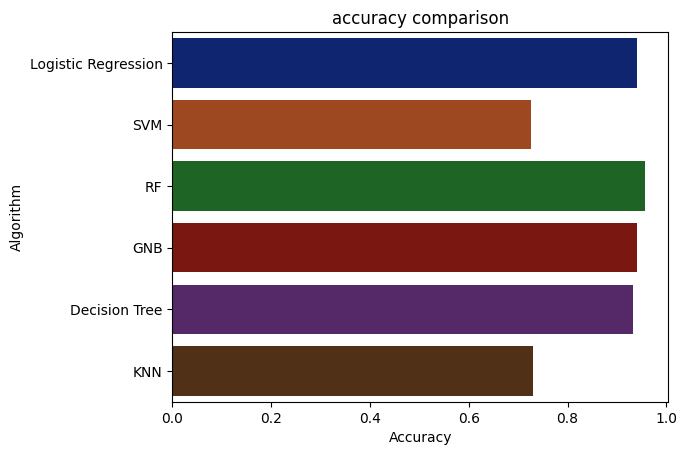

In [145]:
plt.figure(dpi = 100)
plt.xlabel('Accuracy')
plt.title('accuracy comparison')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = models,palette='dark')